In [109]:
%matplotlib notebook 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy

from sklearn import linear_model


<IPython.core.display.Javascript object>


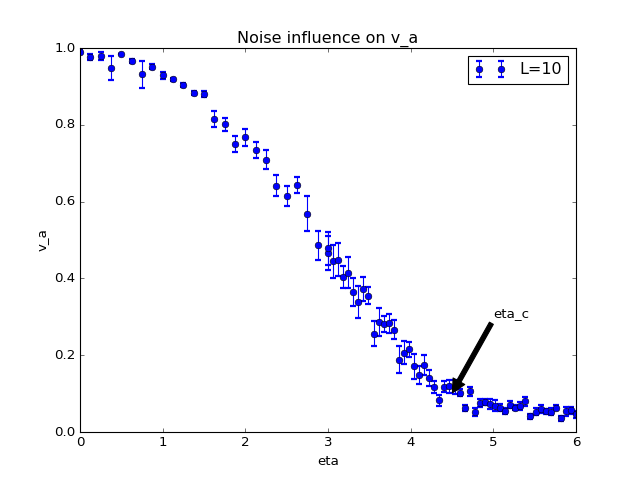

In [110]:
"""We would like to know how the noise eta influences the order of the flock of birds,
when the flock has reached a stationnary state. 
It means that v_a, the normalized average velocity of the bird
has stabilized, wich is the case after approximately 150 steps for standard densities.
First, we are ploting v_a, the normalized average velocity of the birds, versus the noise, for L=10"""


M = np.loadtxt("noise_influenceL=10.txt")
Noise = M[:,0]
V_n = M[:,1]
Sigma_n = M[:,2]/np.sqrt(10)

noise_fig = plt.figure()
plt.errorbar(Noise, V_n, yerr=Sigma_n, fmt='o', color = 'b', ecolor='b', capthick=2, label='L=10')
plt.xlabel("eta")
plt.ylabel("v_a")
plt.annotate('eta_c', xy=(4.5, 0.1), xytext=(5, 0.3), arrowprops={'facecolor':'black', 'shrink':0.01})
plt.legend()
plt.title('Noise influence on v_a')
plt.savefig('noise_influenceL=10.png')

<IPython.core.display.Javascript object>


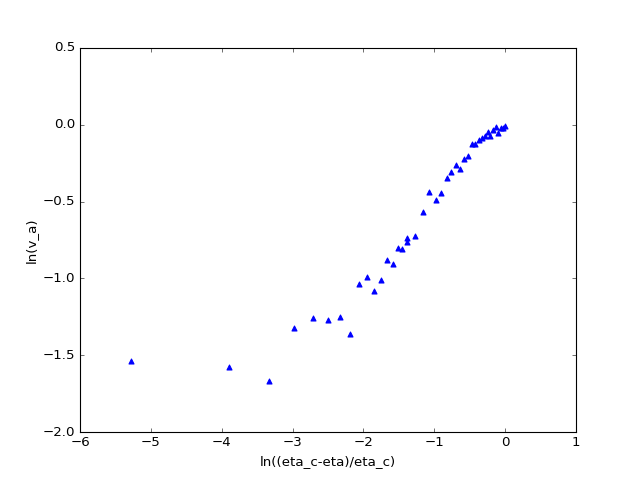

LinregressResult(slope=0.42129744193174501, intercept=-0.061311750642077834, rvalue=0.94254331006686998, pvalue=1.1935233438289644e-20, stderr=0.023610934032742247)


In [111]:
X=[]
Y=[]
eta_c=4.
for i in range(len(Noise)) :
    if eta_c-Noise[i]>0:
        X.append(np.log(np.abs(eta_c-Noise[i])/eta_c))    
        Y.append(np.log(V_n[i]))
plt.scatter(X,Y,color="blue", marker="^")
lr = scipy.stats.linregress(X,Y)
print(lr)
plt.xlabel('ln((eta_c-eta)/eta_c)')
plt.ylabel('ln(v_a)')
plt.title('')



<IPython.core.display.Javascript object>


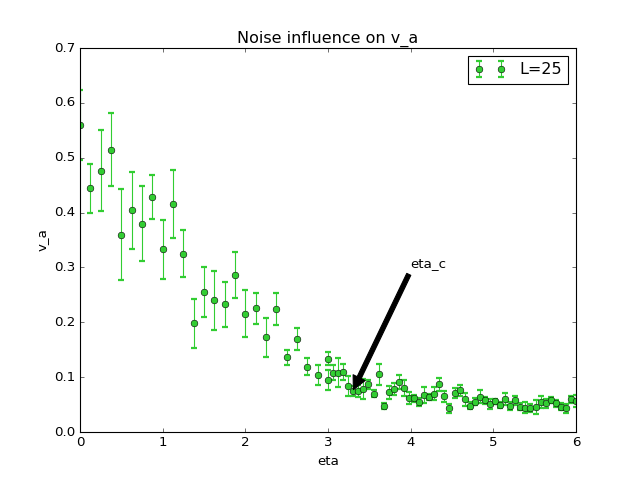

In [60]:
"""The same for L=25. We have datas for L=4,5,7,10,12,15,20,25"""

M = np.loadtxt("noise_influenceL=25.txt")
Noise = M[:,0]
V_n = M[:,1]
Sigma_n = M[:,2]/np.sqrt(10)

noise_fig = plt.figure()
plt.errorbar(Noise, V_n, yerr=Sigma_n, fmt='o', color = 'limegreen', ecolor='limegreen', capthick=2, label='L=25')
plt.xlabel("eta")
plt.ylabel("v_a")
plt.annotate('eta_c', xy=(3.3, 0.075), xytext=(4, 0.3), arrowprops={'facecolor':'black', 'shrink':0.01})
plt.legend()
plt.title('Noise influence on v_a')
plt.savefig('noise_influenceL=25.png')

<IPython.core.display.Javascript object>


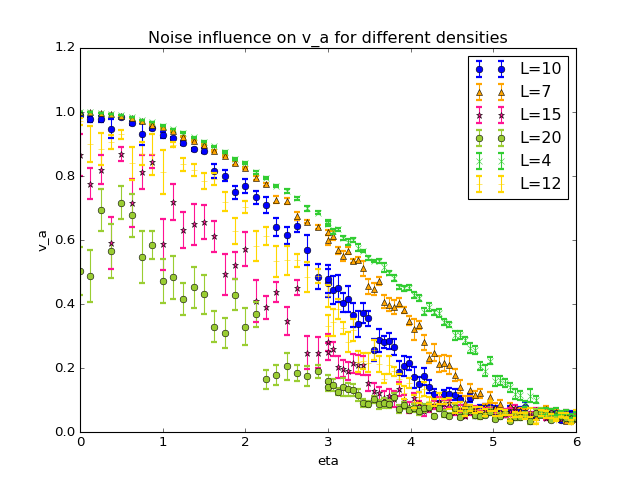

In [112]:
"""In order to visualize the effect of L on the curves, we can plot them on the same fig"""


M = np.loadtxt("noise_influenceL=10.txt")
Noise = M[:,0]
V_n = M[:,1]
Sigma_n = M[:,2]/np.sqrt(10)

M2 = np.loadtxt("noise_influenceL=7.txt")
Noise2 = M2[:,0]
V_n2 = M2[:,1]
Sigma_n2 = M2[:,2]/np.sqrt(10)

M3 = np.loadtxt("noise_influenceL=15.txt")
Noise3 = M3[:,0]
V_n3 = M3[:,1]
Sigma_n3 = M3[:,2]/np.sqrt(10)

M4 = np.loadtxt("noise_influenceL=20.txt")
Noise4 = M4[:,0]
V_n4 = M4[:,1]
Sigma_n4 = M4[:,2]/np.sqrt(10)

M5 = np.loadtxt("noise_influenceL=4.txt")
Noise5 = M5[:,0]
V_n5 = M5[:,1]
Sigma_n5 = M5[:,2]/np.sqrt(10)

M6 = np.loadtxt("noise_influenceL=12.txt")
Noise6 = M6[:,0]
V_n6 = M6[:,1]
Sigma_n6 = M6[:,2]/np.sqrt(10)


noise_fig = plt.figure()
plt.errorbar(Noise, V_n, yerr=Sigma_n, fmt='o', color = 'b', ecolor='b', capthick=2, label='L=10')
plt.errorbar(Noise2, V_n2, yerr=Sigma_n2, fmt='^', color='orange', ecolor='orange', capthick=2, label='L=7')
plt.errorbar(Noise3, V_n3, yerr=Sigma_n3, fmt='*', color='deeppink', ecolor='deeppink', capthick=2, label='L=15')
plt.errorbar(Noise4, V_n4, yerr=Sigma_n4, fmt='o', color='yellowgreen', ecolor='yellowgreen', capthick=2, label='L=20')
plt.errorbar(Noise5, V_n5, yerr=Sigma_n5, fmt='x', color='limegreen', ecolor='limegreen', capthick=2, label='L=4')
plt.errorbar(Noise6, V_n6, yerr=Sigma_n6, fmt='+', color='gold', ecolor='gold', capthick=2, label='L=12')
plt.xlabel("eta")
plt.ylabel("v_a")
plt.title('Noise influence on v_a for different densities')
plt.legend()
plt.savefig('noise_influence_for _different_densities.png')

<IPython.core.display.Javascript object>


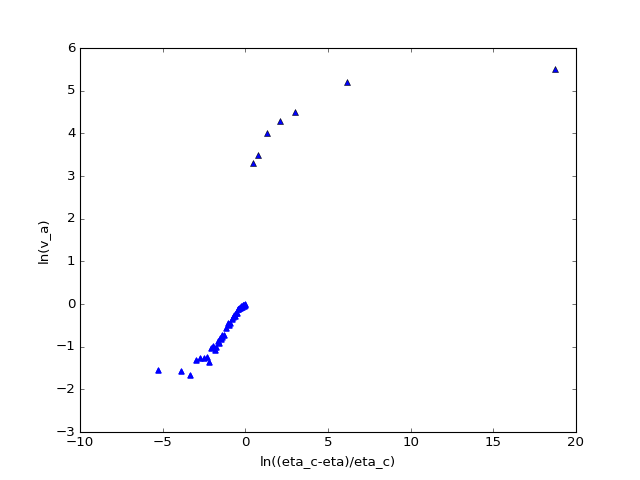

In [106]:
"""We read off the value of eta_c on each of the previous curve. 
eta_c is the critical noise, depending on the density, above which the average velocity of the flock is equal to zero
We plot the curve eta_c versus the density N/L**2"""

L=[4.,7.,10.,12.,15.,20.,25.]
Eta_c = [5.5,5.2,4.5,4.3,4,3.5,3.3]

N= 300

D=[]
for i in range (7):
    D.append(300./L[i]**2)
    
eta_c_fig = plt.figure()
plt.plot(D,Eta_c, color="blue", linewidth=0., marker="^")
plt.xlabel('density')
plt.ylabel('eta_c (rad)')
plt.title('variation of eta_c with the density')
plt.savefig('variation of eta_c with the density.png')